In [56]:
#Ignorar os erros
import warnings
warnings.filterwarnings('ignore')
#pandas
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib as mpl
import locale


PRÉ PROCESSAMENTO DOS DADOS 

In [5]:
#importando o dataset

#Dataset 16 ao 26/01/2024
df_pacotes_entregues_1 = pd.read_csv('./pacotes_entregue_16_26012024_brutos.csv',delimiter=';')

#Dataset 27 ao 31/01/2024
df_pacotes_entregues_2 = pd.read_csv('./pacotes_entregues_27_31012024.csv',delimiter=';')

#Concatemando os dataframe

df_pacotes_entregues = pd.concat([df_pacotes_entregues_1,df_pacotes_entregues_2])
#Exibindo o dataframe

df_pacotes_entregues.head()

,Número de pedido JMS,Franqueado,Base de entrega,Responsável pela entrega,Marca de assinatura,Valor Mercadoria,CEP destino,Endereço completo,Cidade Destino,Distrito destinatário,Destinatário,Horário da entrega,CNPJ,Peso cobrável
0,888000353786415,NP RIO 02,CD RIO 003,MEI CARRO - PRISCILA DOS SANTOS PIRES,Recebimento com assinatura normal,"199,07",20550045,Rua Carmela DutraRua Carmela Dutra 69,Rio de Janeiro,TIJUCA,Andreia Santos,2024-01-26 15:30:55,13083938730,"3,81"
1,888000365456351,NP CFB 01,CD MAC 001,TAC CARRO - FABIANO CHAGAS DO ESPIRITO SANTO,Recebimento com assinatura normal,"86,89",27933160,Rua João Batista da Silva LessaRua João Batist...,Macaé,GLORIA,Flávia Do Bem Castilho de Almei,2024-01-26 18:12:50,8282001732,"0,3"
2,888000375340208,NP DQC 01,CD NVF 001,MEI CARRO - RODRIGO SCHOTT PINHEIRO,Recebimento com assinatura normal,"10,65",28613720,Rua Emília FalchettoRua Emília Falchetto 157,Nova Friburgo,CORDOEIRA,Thayna Oliveira,2024-01-26 18:37:38,5485985769,"0,6"
3,888000376008740,NP RIO 02,CD RIO 001,MEI MOTO - THALES DA SILVA BEZERRA,Recebimento com assinatura normal,"208,66",22713589,Rua Rio ArealRua Rio Areal 1,Rio de Janeiro,JACAREPAGUA,Fatima Santos Ferreira,2024-01-26 22:06:19,17253242700,"3,4"
4,888000385118437,NP CFB 01,CD MAC 001,TAC CARRO - JAIRO ROBERTO LOPES GOMES,Recebimento com assinatura normal,"18,52",27935360,Rua porto alegreRua porto alegre 115,Macaé,RIVIERA FLUMINENSE,Yasmin Thomaz de lima Vieira,2024-01-26 21:21:34,72880341787,"1,05"


In [6]:
#Verificando a dimensão

df_pacotes_entregues.shape

(442024, 14)

In [7]:
#Verificando os nulos

df_pacotes_entregues.isnull().sum()

Número de pedido JMS        0
Franqueado                  0
Base de entrega             0
Responsável pela entrega    0
Marca de assinatura         0
Valor Mercadoria            0
CEP destino                 0
Endereço completo           0
Cidade Destino              0
Distrito destinatário       1
Destinatário                0
Horário da entrega          0
CNPJ                        0
Peso cobrável               0
dtype: int64

In [8]:
#Modificando o nome das colunas 

df_pacotes_entregues.rename(columns={'Número de pedido JMS':'NUMERO_PEDIDO_JMS',
                                    'Franqueado':'FRANQUEADO',
                                     'Responsável pela entrega':'AGREGADO',
                                     'Valor Mercadoria':'VALOR_MERCADORIA',
                                     'CEP destino':'CEP',
                                     'Marca de assinatura':'ASSINATURA',
                                     'Endereço completo':'ENDERECO_COMPLETO',
                                     'Cidade Destino':'CIDADE',
                                     'Distrito destinatário':'BAIRRO',
                                     'Destinatário':'DESTINATARIO',
                                     'Horário da entrega':'HORARIO_ENTREGA',
                                     'Base de entrega':'BASE_ENTREGA',
                                     'Peso cobrável':'PESO_COBRAVEL',
                                     'CNPJ':'CPF_CNPJ'}, inplace=True)
#Exibindo o dataframe
df_pacotes_entregues.head()


                                     
                                     

,NUMERO_PEDIDO_JMS,FRANQUEADO,BASE_ENTREGA,AGREGADO,ASSINATURA,VALOR_MERCADORIA,CEP,ENDERECO_COMPLETO,CIDADE,BAIRRO,DESTINATARIO,HORARIO_ENTREGA,CPF_CNPJ,PESO_COBRAVEL
0,888000353786415,NP RIO 02,CD RIO 003,MEI CARRO - PRISCILA DOS SANTOS PIRES,Recebimento com assinatura normal,"199,07",20550045,Rua Carmela DutraRua Carmela Dutra 69,Rio de Janeiro,TIJUCA,Andreia Santos,2024-01-26 15:30:55,13083938730,"3,81"
1,888000365456351,NP CFB 01,CD MAC 001,TAC CARRO - FABIANO CHAGAS DO ESPIRITO SANTO,Recebimento com assinatura normal,"86,89",27933160,Rua João Batista da Silva LessaRua João Batist...,Macaé,GLORIA,Flávia Do Bem Castilho de Almei,2024-01-26 18:12:50,8282001732,"0,3"
2,888000375340208,NP DQC 01,CD NVF 001,MEI CARRO - RODRIGO SCHOTT PINHEIRO,Recebimento com assinatura normal,"10,65",28613720,Rua Emília FalchettoRua Emília Falchetto 157,Nova Friburgo,CORDOEIRA,Thayna Oliveira,2024-01-26 18:37:38,5485985769,"0,6"
3,888000376008740,NP RIO 02,CD RIO 001,MEI MOTO - THALES DA SILVA BEZERRA,Recebimento com assinatura normal,"208,66",22713589,Rua Rio ArealRua Rio Areal 1,Rio de Janeiro,JACAREPAGUA,Fatima Santos Ferreira,2024-01-26 22:06:19,17253242700,"3,4"
4,888000385118437,NP CFB 01,CD MAC 001,TAC CARRO - JAIRO ROBERTO LOPES GOMES,Recebimento com assinatura normal,"18,52",27935360,Rua porto alegreRua porto alegre 115,Macaé,RIVIERA FLUMINENSE,Yasmin Thomaz de lima Vieira,2024-01-26 21:21:34,72880341787,"1,05"


MUDANDO O TAMANHO DAS STRINGS DE ALGUNS ATRIBUTOS PARA FACILITAR NO JOIN


In [9]:
#modificando as string para maiusculas

df_pacotes_entregues['AGREGADO'] = df_pacotes_entregues['AGREGADO'].str.upper()

df_pacotes_entregues['CIDADE'] = df_pacotes_entregues['CIDADE'].str.upper()

df_pacotes_entregues['BAIRRO'] = df_pacotes_entregues['BAIRRO'].str.upper()

df_pacotes_entregues['DESTINATARIO'] = df_pacotes_entregues['DESTINATARIO'].str.upper()

df_pacotes_entregues['ASSINATURA'] = df_pacotes_entregues['ASSINATURA'].str.upper()

df_pacotes_entregues['ENDERECO_COMPLETO'] = df_pacotes_entregues['ENDERECO_COMPLETO'].str.upper()

#Exibindo o dataframe

df_pacotes_entregues.head(2)

,NUMERO_PEDIDO_JMS,FRANQUEADO,BASE_ENTREGA,AGREGADO,ASSINATURA,VALOR_MERCADORIA,CEP,ENDERECO_COMPLETO,CIDADE,BAIRRO,DESTINATARIO,HORARIO_ENTREGA,CPF_CNPJ,PESO_COBRAVEL
0,888000353786415,NP RIO 02,CD RIO 003,MEI CARRO - PRISCILA DOS SANTOS PIRES,RECEBIMENTO COM ASSINATURA NORMAL,"199,07",20550045,RUA CARMELA DUTRARUA CARMELA DUTRA 69,RIO DE JANEIRO,TIJUCA,ANDREIA SANTOS,2024-01-26 15:30:55,13083938730,"3,81"
1,888000365456351,NP CFB 01,CD MAC 001,TAC CARRO - FABIANO CHAGAS DO ESPIRITO SANTO,RECEBIMENTO COM ASSINATURA NORMAL,"86,89",27933160,RUA JOÃO BATISTA DA SILVA LESSARUA JOÃO BATIST...,MACAÉ,GLORIA,FLÁVIA DO BEM CASTILHO DE ALMEI,2024-01-26 18:12:50,8282001732,"0,3"


In [10]:
#exibindo as informações dos tipos dos atributos
df_pacotes_entregues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442024 entries, 0 to 109263
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   NUMERO_PEDIDO_JMS  442024 non-null  int64 
 1   FRANQUEADO         442024 non-null  object
 2   BASE_ENTREGA       442024 non-null  object
 3   AGREGADO           442024 non-null  object
 4   ASSINATURA         442024 non-null  object
 5   VALOR_MERCADORIA   442024 non-null  object
 6   CEP                442024 non-null  int64 
 7   ENDERECO_COMPLETO  442024 non-null  object
 8   CIDADE             442024 non-null  object
 9   BAIRRO             442023 non-null  object
 10  DESTINATARIO       442024 non-null  object
 11  HORARIO_ENTREGA    442024 non-null  object
 12  CPF_CNPJ           442024 non-null  int64 
 13  PESO_COBRAVEL      442024 non-null  object
dtypes: int64(3), object(11)
memory usage: 50.6+ MB


In [11]:
#Moficando o tipo do atributo para string

df_pacotes_entregues['CPF_CNPJ'] = df_pacotes_entregues['CPF_CNPJ'].astype(str)

#exibindo
df_pacotes_entregues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442024 entries, 0 to 109263
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   NUMERO_PEDIDO_JMS  442024 non-null  int64 
 1   FRANQUEADO         442024 non-null  object
 2   BASE_ENTREGA       442024 non-null  object
 3   AGREGADO           442024 non-null  object
 4   ASSINATURA         442024 non-null  object
 5   VALOR_MERCADORIA   442024 non-null  object
 6   CEP                442024 non-null  int64 
 7   ENDERECO_COMPLETO  442024 non-null  object
 8   CIDADE             442024 non-null  object
 9   BAIRRO             442023 non-null  object
 10  DESTINATARIO       442024 non-null  object
 11  HORARIO_ENTREGA    442024 non-null  object
 12  CPF_CNPJ           442024 non-null  object
 13  PESO_COBRAVEL      442024 non-null  object
dtypes: int64(2), object(12)
memory usage: 50.6+ MB


In [12]:
df_pacotes_entregues.head(2)

,NUMERO_PEDIDO_JMS,FRANQUEADO,BASE_ENTREGA,AGREGADO,ASSINATURA,VALOR_MERCADORIA,CEP,ENDERECO_COMPLETO,CIDADE,BAIRRO,DESTINATARIO,HORARIO_ENTREGA,CPF_CNPJ,PESO_COBRAVEL
0,888000353786415,NP RIO 02,CD RIO 003,MEI CARRO - PRISCILA DOS SANTOS PIRES,RECEBIMENTO COM ASSINATURA NORMAL,"199,07",20550045,RUA CARMELA DUTRARUA CARMELA DUTRA 69,RIO DE JANEIRO,TIJUCA,ANDREIA SANTOS,2024-01-26 15:30:55,13083938730,"3,81"
1,888000365456351,NP CFB 01,CD MAC 001,TAC CARRO - FABIANO CHAGAS DO ESPIRITO SANTO,RECEBIMENTO COM ASSINATURA NORMAL,"86,89",27933160,RUA JOÃO BATISTA DA SILVA LESSARUA JOÃO BATIST...,MACAÉ,GLORIA,FLÁVIA DO BEM CASTILHO DE ALMEI,2024-01-26 18:12:50,8282001732,"0,3"


Substituir a virgula por ponto, assim consigo converter o atributo para float

In [13]:
#modifica a virgula por ponto

df_pacotes_entregues['VALOR_MERCADORIA'] = df_pacotes_entregues['VALOR_MERCADORIA'].str.replace(',','.')

df_pacotes_entregues['PESO_COBRAVEL'] = df_pacotes_entregues['PESO_COBRAVEL'].str.replace(',','.')

#Exibindo

df_pacotes_entregues.head(2)

,NUMERO_PEDIDO_JMS,FRANQUEADO,BASE_ENTREGA,AGREGADO,ASSINATURA,VALOR_MERCADORIA,CEP,ENDERECO_COMPLETO,CIDADE,BAIRRO,DESTINATARIO,HORARIO_ENTREGA,CPF_CNPJ,PESO_COBRAVEL
0,888000353786415,NP RIO 02,CD RIO 003,MEI CARRO - PRISCILA DOS SANTOS PIRES,RECEBIMENTO COM ASSINATURA NORMAL,199.07,20550045,RUA CARMELA DUTRARUA CARMELA DUTRA 69,RIO DE JANEIRO,TIJUCA,ANDREIA SANTOS,2024-01-26 15:30:55,13083938730,3.81
1,888000365456351,NP CFB 01,CD MAC 001,TAC CARRO - FABIANO CHAGAS DO ESPIRITO SANTO,RECEBIMENTO COM ASSINATURA NORMAL,86.89,27933160,RUA JOÃO BATISTA DA SILVA LESSARUA JOÃO BATIST...,MACAÉ,GLORIA,FLÁVIA DO BEM CASTILHO DE ALMEI,2024-01-26 18:12:50,8282001732,0.3


In [14]:
#transformando o atributo em float

df_pacotes_entregues['VALOR_MERCADORIA'] = df_pacotes_entregues['VALOR_MERCADORIA'].astype(float)

df_pacotes_entregues['PESO_COBRAVEL'] = df_pacotes_entregues['PESO_COBRAVEL'].astype(float)

#exibindo as info do dataframe
df_pacotes_entregues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442024 entries, 0 to 109263
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NUMERO_PEDIDO_JMS  442024 non-null  int64  
 1   FRANQUEADO         442024 non-null  object 
 2   BASE_ENTREGA       442024 non-null  object 
 3   AGREGADO           442024 non-null  object 
 4   ASSINATURA         442024 non-null  object 
 5   VALOR_MERCADORIA   442024 non-null  float64
 6   CEP                442024 non-null  int64  
 7   ENDERECO_COMPLETO  442024 non-null  object 
 8   CIDADE             442024 non-null  object 
 9   BAIRRO             442023 non-null  object 
 10  DESTINATARIO       442024 non-null  object 
 11  HORARIO_ENTREGA    442024 non-null  object 
 12  CPF_CNPJ           442024 non-null  object 
 13  PESO_COBRAVEL      442024 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 50.6+ MB


In [15]:
#transformando no tipo datetime
df_pacotes_entregues['HORARIO_ENTREGA'] = pd.to_datetime(df_pacotes_entregues['HORARIO_ENTREGA'])

#Extrair somente a data
df_pacotes_entregues['HORARIO_ENTREGA'] = df_pacotes_entregues['HORARIO_ENTREGA'].dt.date

#exibindo o dataframe
df_pacotes_entregues.head()


,NUMERO_PEDIDO_JMS,FRANQUEADO,BASE_ENTREGA,AGREGADO,ASSINATURA,VALOR_MERCADORIA,CEP,ENDERECO_COMPLETO,CIDADE,BAIRRO,DESTINATARIO,HORARIO_ENTREGA,CPF_CNPJ,PESO_COBRAVEL
0,888000353786415,NP RIO 02,CD RIO 003,MEI CARRO - PRISCILA DOS SANTOS PIRES,RECEBIMENTO COM ASSINATURA NORMAL,199.07,20550045,RUA CARMELA DUTRARUA CARMELA DUTRA 69,RIO DE JANEIRO,TIJUCA,ANDREIA SANTOS,2024-01-26,13083938730,3.81
1,888000365456351,NP CFB 01,CD MAC 001,TAC CARRO - FABIANO CHAGAS DO ESPIRITO SANTO,RECEBIMENTO COM ASSINATURA NORMAL,86.89,27933160,RUA JOÃO BATISTA DA SILVA LESSARUA JOÃO BATIST...,MACAÉ,GLORIA,FLÁVIA DO BEM CASTILHO DE ALMEI,2024-01-26,8282001732,0.30
2,888000375340208,NP DQC 01,CD NVF 001,MEI CARRO - RODRIGO SCHOTT PINHEIRO,RECEBIMENTO COM ASSINATURA NORMAL,10.65,28613720,RUA EMÍLIA FALCHETTORUA EMÍLIA FALCHETTO 157,NOVA FRIBURGO,CORDOEIRA,THAYNA OLIVEIRA,2024-01-26,5485985769,0.60
3,888000376008740,NP RIO 02,CD RIO 001,MEI MOTO - THALES DA SILVA BEZERRA,RECEBIMENTO COM ASSINATURA NORMAL,208.66,22713589,RUA RIO AREALRUA RIO AREAL 1,RIO DE JANEIRO,JACAREPAGUA,FATIMA SANTOS FERREIRA,2024-01-26,17253242700,3.40
4,888000385118437,NP CFB 01,CD MAC 001,TAC CARRO - JAIRO ROBERTO LOPES GOMES,RECEBIMENTO COM ASSINATURA NORMAL,18.52,27935360,RUA PORTO ALEGRERUA PORTO ALEGRE 115,MACAÉ,RIVIERA FLUMINENSE,YASMIN THOMAZ DE LIMA VIEIRA,2024-01-26,72880341787,1.05


In [16]:
#Transformando novamente para datetime, porque quando extrai somente a data
# o atributo é convertido para string(object)

df_pacotes_entregues['HORARIO_ENTREGA'] = pd.to_datetime(df_pacotes_entregues['HORARIO_ENTREGA'])

df_pacotes_entregues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442024 entries, 0 to 109263
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   NUMERO_PEDIDO_JMS  442024 non-null  int64         
 1   FRANQUEADO         442024 non-null  object        
 2   BASE_ENTREGA       442024 non-null  object        
 3   AGREGADO           442024 non-null  object        
 4   ASSINATURA         442024 non-null  object        
 5   VALOR_MERCADORIA   442024 non-null  float64       
 6   CEP                442024 non-null  int64         
 7   ENDERECO_COMPLETO  442024 non-null  object        
 8   CIDADE             442024 non-null  object        
 9   BAIRRO             442023 non-null  object        
 10  DESTINATARIO       442024 non-null  object        
 11  HORARIO_ENTREGA    442024 non-null  datetime64[ns]
 12  CPF_CNPJ           442024 non-null  object        
 13  PESO_COBRAVEL      442024 non-null  float64      

In [17]:
#exibindo os valores nulos

df_pacotes_entregues.isna().sum()

NUMERO_PEDIDO_JMS    0
FRANQUEADO           0
BASE_ENTREGA         0
AGREGADO             0
ASSINATURA           0
VALOR_MERCADORIA     0
CEP                  0
ENDERECO_COMPLETO    0
CIDADE               0
BAIRRO               1
DESTINATARIO         0
HORARIO_ENTREGA      0
CPF_CNPJ             0
PESO_COBRAVEL        0
dtype: int64

In [18]:
#Filtrando somente os valores nulos do atributo 'CEP'
#Acima, filtrei somente os nulos e mostra que são multiplos que 
#não eram para ter aparecido.

df_pacotes_nao_entregues = df_pacotes_entregues[df_pacotes_entregues['BAIRRO'].isna()]

df_pacotes_nao_entregues.shape

(1, 14)

In [19]:
df_pacotes_nao_entregues.isnull().sum()

NUMERO_PEDIDO_JMS    0
FRANQUEADO           0
BASE_ENTREGA         0
AGREGADO             0
ASSINATURA           0
VALOR_MERCADORIA     0
CEP                  0
ENDERECO_COMPLETO    0
CIDADE               0
BAIRRO               1
DESTINATARIO         0
HORARIO_ENTREGA      0
CPF_CNPJ             0
PESO_COBRAVEL        0
dtype: int64

In [20]:
#Exibindo o pacotes com missings

df_pacotes_nao_entregues.head()

,NUMERO_PEDIDO_JMS,FRANQUEADO,BASE_ENTREGA,AGREGADO,ASSINATURA,VALOR_MERCADORIA,CEP,ENDERECO_COMPLETO,CIDADE,BAIRRO,DESTINATARIO,HORARIO_ENTREGA,CPF_CNPJ,PESO_COBRAVEL
107741,888500754071855,NP RIO 02,CD RIO 002,ETC NATAN RANGEL CARRO - NATAN RANGEL COSTA,RECEBIMENTO COM ASSINATURA NORMAL,31.98,21046530,"RUA EDUCAÇÃO, 340, RESTAURANTE SUSHI IN RIO",RIO DE JANEIRO,NaN,RAIANE SILVA,2024-01-27,13117461701,0.2


In [21]:
#Modificando o missings por "BAIRRO INEXISTENTE'

df_pacotes_entregues['BAIRRO'].fillna('BAIRRO INEXISTENTE',inplace=True)

df_pacotes_entregues.head()

,NUMERO_PEDIDO_JMS,FRANQUEADO,BASE_ENTREGA,AGREGADO,ASSINATURA,VALOR_MERCADORIA,CEP,ENDERECO_COMPLETO,CIDADE,BAIRRO,DESTINATARIO,HORARIO_ENTREGA,CPF_CNPJ,PESO_COBRAVEL
0,888000353786415,NP RIO 02,CD RIO 003,MEI CARRO - PRISCILA DOS SANTOS PIRES,RECEBIMENTO COM ASSINATURA NORMAL,199.07,20550045,RUA CARMELA DUTRARUA CARMELA DUTRA 69,RIO DE JANEIRO,TIJUCA,ANDREIA SANTOS,2024-01-26,13083938730,3.81
1,888000365456351,NP CFB 01,CD MAC 001,TAC CARRO - FABIANO CHAGAS DO ESPIRITO SANTO,RECEBIMENTO COM ASSINATURA NORMAL,86.89,27933160,RUA JOÃO BATISTA DA SILVA LESSARUA JOÃO BATIST...,MACAÉ,GLORIA,FLÁVIA DO BEM CASTILHO DE ALMEI,2024-01-26,8282001732,0.30
2,888000375340208,NP DQC 01,CD NVF 001,MEI CARRO - RODRIGO SCHOTT PINHEIRO,RECEBIMENTO COM ASSINATURA NORMAL,10.65,28613720,RUA EMÍLIA FALCHETTORUA EMÍLIA FALCHETTO 157,NOVA FRIBURGO,CORDOEIRA,THAYNA OLIVEIRA,2024-01-26,5485985769,0.60
3,888000376008740,NP RIO 02,CD RIO 001,MEI MOTO - THALES DA SILVA BEZERRA,RECEBIMENTO COM ASSINATURA NORMAL,208.66,22713589,RUA RIO AREALRUA RIO AREAL 1,RIO DE JANEIRO,JACAREPAGUA,FATIMA SANTOS FERREIRA,2024-01-26,17253242700,3.40
4,888000385118437,NP CFB 01,CD MAC 001,TAC CARRO - JAIRO ROBERTO LOPES GOMES,RECEBIMENTO COM ASSINATURA NORMAL,18.52,27935360,RUA PORTO ALEGRERUA PORTO ALEGRE 115,MACAÉ,RIVIERA FLUMINENSE,YASMIN THOMAZ DE LIMA VIEIRA,2024-01-26,72880341787,1.05


In [22]:
#excluindo os valores nulos 

df_pacotes_entregues_clear = df_pacotes_entregues.dropna(subset=['CEP'])

df_pacotes_entregues_clear.isnull().sum()

NUMERO_PEDIDO_JMS    0
FRANQUEADO           0
BASE_ENTREGA         0
AGREGADO             0
ASSINATURA           0
VALOR_MERCADORIA     0
CEP                  0
ENDERECO_COMPLETO    0
CIDADE               0
BAIRRO               0
DESTINATARIO         0
HORARIO_ENTREGA      0
CPF_CNPJ             0
PESO_COBRAVEL        0
dtype: int64

In [32]:
#Verificando se existem pedidos duplicados

df_pacotes_entregues_clear['NUMERO_PEDIDO_JMS'].value_counts()

NUMERO_PEDIDO_JMS
888000353786415    1
888500745282905    1
888500745256254    1
888500745249808    1
888500745245025    1
                  ..
888000400137988    1
888000400129445    1
888000400124225    1
888000400108616    1
888700018171496    1
Name: count, Length: 442024, dtype: int64

In [49]:
#Verificando a dimensão do dataframe

df_pacotes_entregues_clear.shape

(442024, 14)

In [50]:
df_pacotes_entregues_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442024 entries, 0 to 109263
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   NUMERO_PEDIDO_JMS  442024 non-null  int64         
 1   FRANQUEADO         442024 non-null  object        
 2   BASE_ENTREGA       442024 non-null  object        
 3   AGREGADO           442024 non-null  object        
 4   ASSINATURA         442024 non-null  object        
 5   VALOR_MERCADORIA   442024 non-null  float64       
 6   CEP                442024 non-null  int64         
 7   ENDERECO_COMPLETO  442024 non-null  object        
 8   CIDADE             442024 non-null  object        
 9   BAIRRO             442024 non-null  object        
 10  DESTINATARIO       442024 non-null  object        
 11  HORARIO_ENTREGA    442024 non-null  datetime64[ns]
 12  CPF_CNPJ           442024 non-null  object        
 13  PESO_COBRAVEL      442024 non-null  float64      

In [51]:
#Exportando os dataframe para csv

df_pacotes_entregues_clear.to_csv('./pacotes_entregues_16_31012024_processado.csv',encoding='utf-8', index=False)

# exportando os pacotes não entregue

#df_pacotes_nao_entregues.to_csv('./pacotes_nao_entregue_16_31012024_processado.csv',encoding='utf-8', index=False)

In [29]:
df_pacotes_entregues_clear.shape

(442024, 14)

In [52]:
df_pacotes_entregues_clear.head(1)

,NUMERO_PEDIDO_JMS,FRANQUEADO,BASE_ENTREGA,AGREGADO,ASSINATURA,VALOR_MERCADORIA,CEP,ENDERECO_COMPLETO,CIDADE,BAIRRO,DESTINATARIO,HORARIO_ENTREGA,CPF_CNPJ,PESO_COBRAVEL
0,888000353786415,NP RIO 02,CD RIO 003,MEI CARRO - PRISCILA DOS SANTOS PIRES,RECEBIMENTO COM ASSINATURA NORMAL,199.07,20550045,RUA CARMELA DUTRARUA CARMELA DUTRA 69,RIO DE JANEIRO,TIJUCA,ANDREIA SANTOS,2024-01-26,13083938730,3.81


Analise exploratório dos dados

In [74]:
#Contagem dos pacotes por base

df_base = df_pacotes_entregues_clear['BASE_ENTREGA'].value_counts(ascending=True)

#Ordenando os valores

#df_base_desc = df_base.sort_values(ascending=False)

# Exibindo o dataframe e ordenando do maior pra menor

df_base

BASE_ENTREGA
CD BSF 001      183
CD MDS 001      277
CD MRT 001      392
CD CRD 001     1012
CD TRI 001     1295
CD CDC 001     1380
CD AST 001     1624
CD RSD 001     2232
CD LIN 001     2305
CD DQC 001     2728
CD IPE 001     2852
CD VTR 001     3173
CD PTL 001     3229
CD GPR 001     3708
CD CDI 001     4160
CD SMT 001     4532
CD TRS 001     5005
CD MAC 001     5056
CD RIO 008     5108
CD DQC 002     5527
CD CPG 001     5847
CD RIO 010     6084
CD NVI 001     6327
CD NVF 001     6578
CD ITB 001     7605
CD VIR 001     7769
CD CFB 001     8045
CD RIO 004     8049
CD ARR 001     8143
CD CLN 001     8992
CD SGC 002    10721
CD RIO 003    10747
CD RIO 001    12147
CD RIO 007    12568
CD ARC 001    13270
CD RIO 006    13453
CD CAR 001    14110
CD RIO 005    17733
CD RIO 009    19027
CD SRR 001    21014
CD SJT 001    26090
CD RIO 002    28069
CD BPR 001    29299
CD SGC 001    29731
CD ADR 001    54828
Name: count, dtype: int64

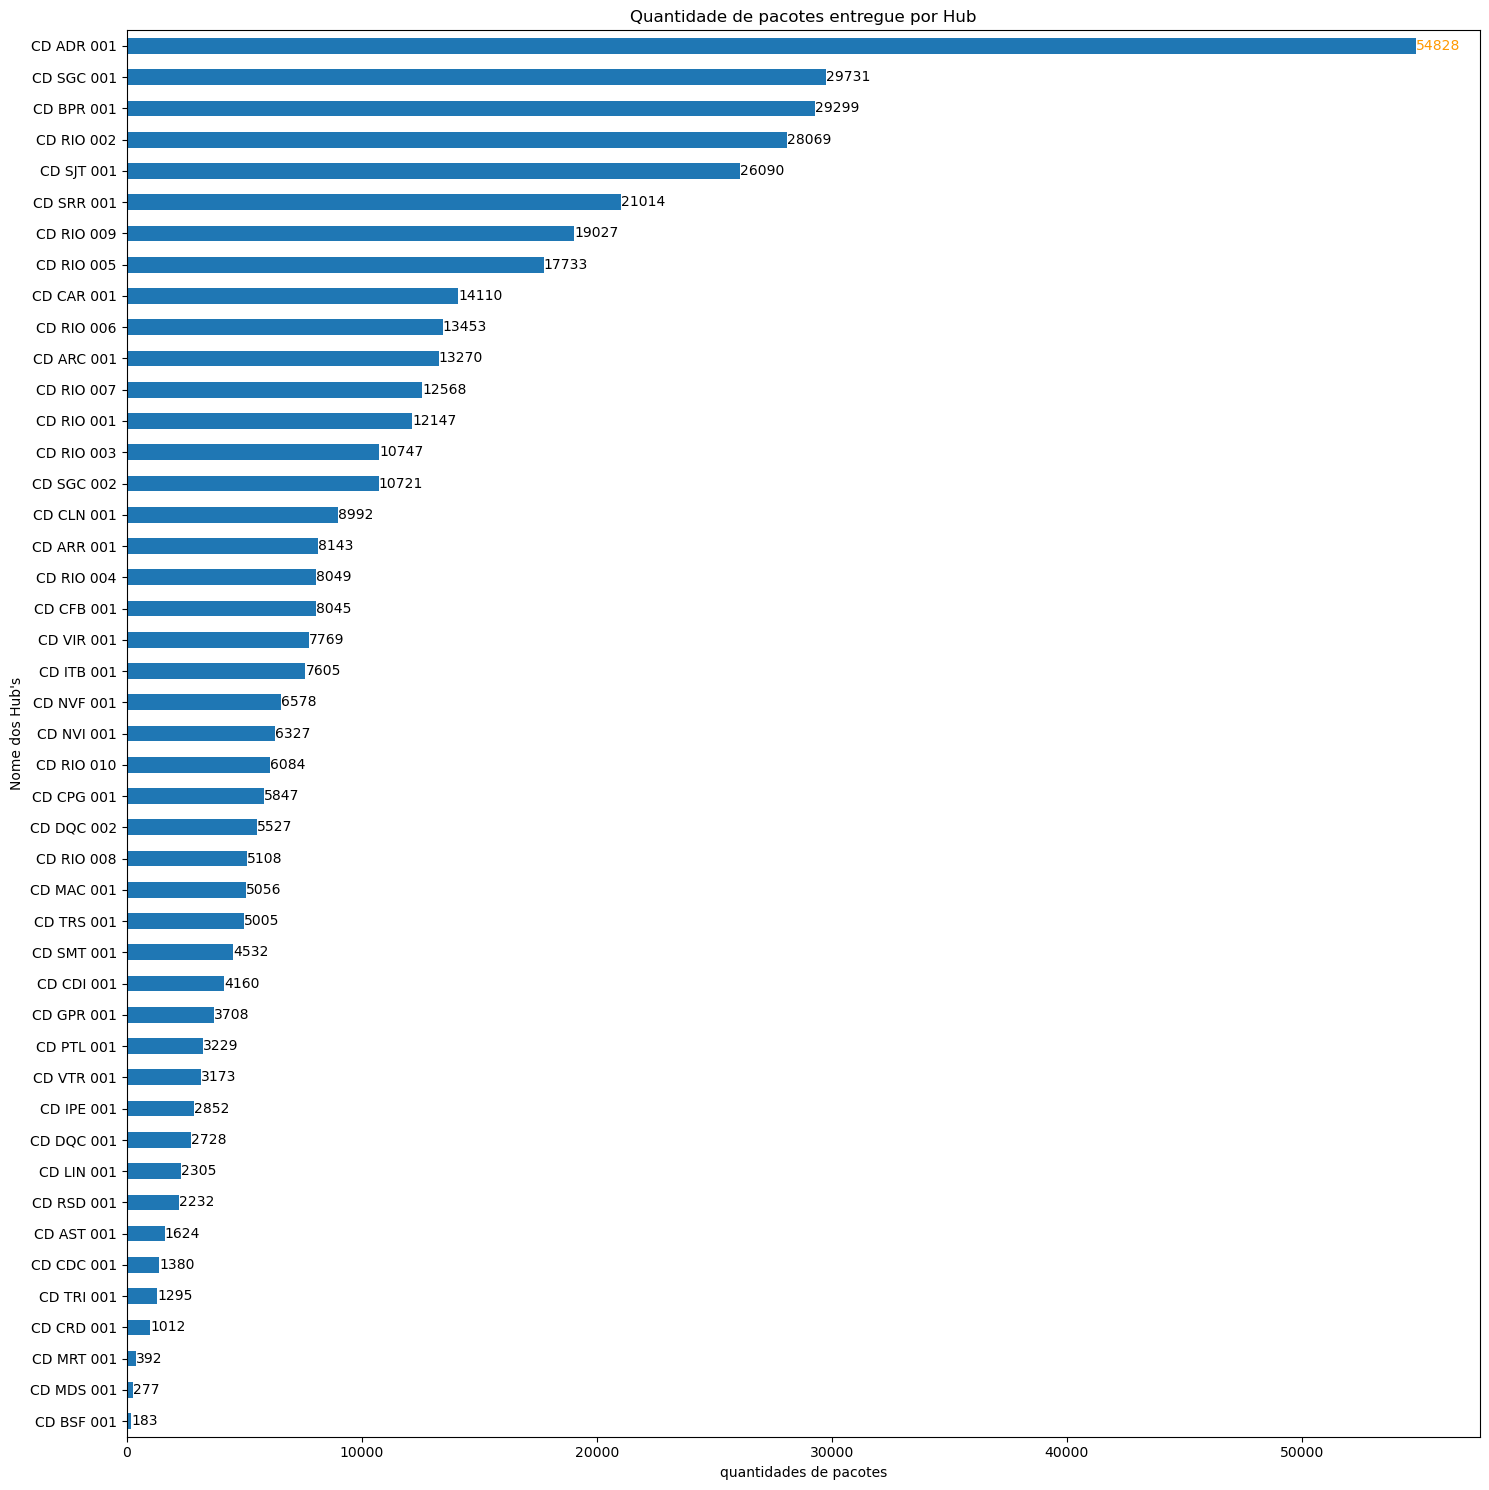

In [96]:
#Criando graficos
#Função pyplot.bar()

# Função pyplot.bar()
fig , ax = plt.subplots(figsize=(15,15))

# plota o gráfico de barras
df_base.plot(kind='barh', legend=False)
plt.title('Quantidade de pacotes entregue por Hub')
plt.xlabel("quantidades de pacotes")
plt.ylabel("Nome dos Hub's")

# Acrescenta os valores sobre as barras

b1 = ax.bar_label(ax.containers[0])

b1[-1].set_color("#ff9900")
# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

#Salva o gráfico
plt.savefig("base_pacotes.svg")
plt.savefig("base_pacotes.pdf")
plt.savefig("base_pacaotes.png",dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

In [98]:
df_pacotes_entregues_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442024 entries, 0 to 109263
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   NUMERO_PEDIDO_JMS  442024 non-null  int64         
 1   FRANQUEADO         442024 non-null  object        
 2   BASE_ENTREGA       442024 non-null  object        
 3   AGREGADO           442024 non-null  object        
 4   ASSINATURA         442024 non-null  object        
 5   VALOR_MERCADORIA   442024 non-null  float64       
 6   CEP                442024 non-null  int64         
 7   ENDERECO_COMPLETO  442024 non-null  object        
 8   CIDADE             442024 non-null  object        
 9   BAIRRO             442024 non-null  object        
 10  DESTINATARIO       442024 non-null  object        
 11  HORARIO_ENTREGA    442024 non-null  datetime64[ns]
 12  CPF_CNPJ           442024 non-null  object        
 13  PESO_COBRAVEL      442024 non-null  float64      

In [ ]:
df_valores_base = df_pacotes_entregues_clear.groupby('BASE_ENTREGA')['VALOR